# NLP With Hotel Review - Rafay Khan

## Table of Contents:
* [Introduction](#intro)
* [Data Dictionary](#data-dictionary)
* [Imports and Sanity Checks](#imps)
* [Explanatory Data Analysis](#EDA)
* [Preprocessing](#Prep)
* [Modelling: ](#Model)
    [Logistical Regression](#LR)
    [PCA & Descion Tree Pipeline](#Pipe)
* [Conclusion](#Con)

## Introduction <a class="anchor" id="intro"></a>

Hotel Management Inc. has tasked us with uncovering the key factors influencing customer satisfaction and ratings in hotel stays. Leveraging a comprehensive dataset containing both textual reviews and stay details, our goal is to perform a thorough analysis, develop predictive models, and derive actionable insights. The dataset includes features such as hotel location, duration of stay, and reviewer sentiments encoded in the Reviewer_Score column.

Our approach begins with an Exploratory Data Analysis (EDA), where we aim to gain a deep understanding of the dataset's characteristics. This involves creating a data dictionary, conducting basic statistical analyses, visualizations, and data preprocessing steps to prepare the data for modeling. During preprocessing, we focus on text data, employing CountVectorizer to transform positive and negative reviews into features for further analysis.

Following EDA and preprocessing, we delve into modeling. Initially, we fit a logistic regression model to the data, assessing train and test accuracies. We then identify the top 20 words from positive and negative reviews that most strongly predict their respective sentiments, extracting valuable insights.

Subsequently, a pipeline is constructed, combining Principal Component Analysis (PCA) with a decision tree classifier. Hyperparameter optimization, including tree depth and minimum leaf node requirements, is performed via 5-fold cross-validation. The results are contrasted with the logistic regression model, providing insights into model performance.

For the best-performing model, a comprehensive evaluation is conducted, analyzing the confusion matrix and metrics such as precision and recall. This detailed assessment aims to uncover model errors and further enhance our understanding of predictive capabilities.

The document is structured to allow for a comprehensive understanding of our process, insights, and findings without the need to delve into the raw code.

## Imports and Sanity Checks <a class="anchor" id="imps"></a>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

from scipy.sparse import csr_matrix, hstack
from sklearn.pipeline import FeatureUnion

## Data Dictionary <a class="anchor" id="data-dictionary"></a>

The dataset at hand encompasses a wealth of information, specifically revolving around customer reviews for hotels. Each record within the dataset corresponds to an individual review, capturing a spectrum of details pertaining to the hotel, reviewer, and the review itself. This data dictionary serves as a crucial reference for comprehending the significance and characteristics of each column in the dataset, shedding light on the types of information available and the manner in which it is formatted. Ranging from unique identifiers like "Unnamed: 0" which indexes all the reviews to indicators reflecting reviewer nationality, hotel location, and various facets of the reviews, the dataset presents a diverse array of features. These features include numerical ratings, textual reviews, geographical coordinates, and categorical indicators, providing a comprehensive foundation for delving into the factors influencing customer sentiments, reviewer demographics, and hotel attributes. This data dictionary is designed to facilitate a clear comprehension of the dataset's composition, setting the stage for rigorous analysis and meaningful interpretation of the hotel reviews dataset.

    Unnamed: 0
        Data Type: Integer (int64)
        Description: An identifier for the reviews (index element I think).

    Additional_Number_of_Scoring
        Data Type: Integer (int64)
        Description: Additional scoring associated with the hotel.

    Average_Score
        Data Type: Float (float64)
        Description: The average score given by reviewers for the hotel.

    Negative_Review
        Data Type: Object (String)
        Description: The text of the negative review given by customers.

    Review_Total_Negative_Word_Counts
        Data Type: Integer (int64)
        Description: The total number of words in the negative review.

    Total_Number_of_Reviews
        Data Type: Integer (int64)
        Description: The total number of reviews for the hotel.

    Positive_Review
        Data Type: Object (String)
        Description: The text of the positive review given by customers.

    Review_Total_Positive_Word_Counts
        Data Type: Integer (int64)
        Description: The total number of words in the positive review.

    Total_Number_of_Reviews_Reviewer_Has_Given
        Data Type: Integer (int64)
        Description: The total number of reviews the reviewer has given.

    Reviewer_Score
        Data Type: Integer (int64)
        Description: The score given by the reviewer.

    Days_Since_Review
        Data Type: Integer (int64)
        Description: The number of days since the review was given.

    Latitude
        Data Type: Float (float64)
        Description: The latitude coordinate of the hotel.

    Longitude
        Data Type: Float (float64)
        Description: The longitude coordinate of the hotel.

    Day
        Data Type: Integer (int64)
        Description: The day when the review was given.

    Month
        Data Type: Integer (int64)
        Description: The month when the review was given.

    Year
        Data Type: Integer (int64)
        Description: The year when the review was given.

    Reviewer_Nationality_Australia
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the reviewer is from Australia.

    Reviewer_Nationality_Ireland
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the reviewer is from Ireland.

    Reviewer_Nationality_UAE
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the reviewer is from the UAE.

    Reviewer_Nationality_UK
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the reviewer is from the UK.

    Reviewer_Nationality_USA
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the reviewer is from the USA.

    Reviewer_Nationality_Other
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the reviewer is from a nationality other than the specified ones.

    Hotel_Address_Amsterdam
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the hotel is located in Amsterdam.

    Hotel_Address_Barcelona
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the hotel is located in Barcelona.

    Hotel_Address_London
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the hotel is located in London.

    Hotel_Address_Milan
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the hotel is located in Milan.

    Hotel_Address_Paris
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the hotel is located in Paris.

    Hotel_Address_Vienna
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the hotel is located in Vienna.

    Leisure_Trip
        Data Type: Integer (int64)
        Description: Binary indicator (1 or 0) for whether the trip was for leisure.

    Nights_Stayed
        Data Type: Integer (int64)
        Description: The number of nights stayed during the trip.

## Exploratory Data Analysis <a class="anchor" id="EDA"></a>

In [125]:
# Reading in the data
hotel_reviews = pd.read_csv('data/Hotel_Reviews.csv')

In [126]:
hotel_reviews.describe()

Unnamed: 0  Additional_Number_of_Scoring  Average_Score  \
count  515738.000000                 515738.000000  515738.000000   
mean   257868.500000                    498.081836       8.397487   
std    148880.880902                    500.538467       0.548048   
min         0.000000                      1.000000       5.200000   
25%    128934.250000                    169.000000       8.100000   
50%    257868.500000                    341.000000       8.400000   
75%    386802.750000                    660.000000       8.800000   
max    515737.000000                   2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515738.000000            515738.000000   
mean                           18.539450              2743.743944   
std                            29.690831              2317.464868   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3613.000000   
max                           408.000000             16670.000000   

       Review_Total_Positive_Word_Counts  \
count                      515738.000000   
mean                           17.776458   
std                            21.804185   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
count                               515738.000000   515738.000000   
mean                                     7.166001        0.570006   
std                                     11.040228        0.495075   
min                                      1.000000        0.000000   
25%                                      1.000000        0.000000   
50%                                      3.000000        1.000000   
75%                                      8.000000        1.000000   
max                                    355.000000        1.000000   

       Days_Since_Review       Latitude  ...  Reviewer_Nationality_USA  \
count      515738.000000  515738.000000  ...             515738.000000   
mean          354.441932      49.432419  ...                  0.068711   
std           208.928124       3.460237  ...                  0.252963   
min             0.000000      41.328376  ...                  0.000000   
25%           175.000000      48.214066  ...                  0.000000   
50%           353.000000      51.499981  ...                  0.000000   
75%           527.000000      51.516288  ...                  0.000000   
max           730.000000      52.400181  ...                  1.000000   

       Reviewer_Nationality_Other  Hotel_Address_Amsterdam  \
count               515738.000000            515738.000000   
mean                     0.365121                 0.110936   
std                      0.481465                 0.314053   
min                      0.000000                 0.000000   
25%                      0.000000                 0.000000   
50%                      0.000000                 0.000000   
75%                      1.000000                 0.000000   
max                      1.000000                 1.000000   

       Hotel_Address_Barcelona  Hotel_Address_London  Hotel_Address_Milan  \
count            515738.000000         515738.000000        515738.000000   
mean                  0.116627              0.508594             0.072143   
std                   0.320976              0.499927             0.258725   
min                   0.000000              0.000000             0.000000   
25%                   0.000000              0.000000             0.000000   
50%                   0.000000              1.000000       

In [128]:
hotel_reviews.shape

(515738, 30)

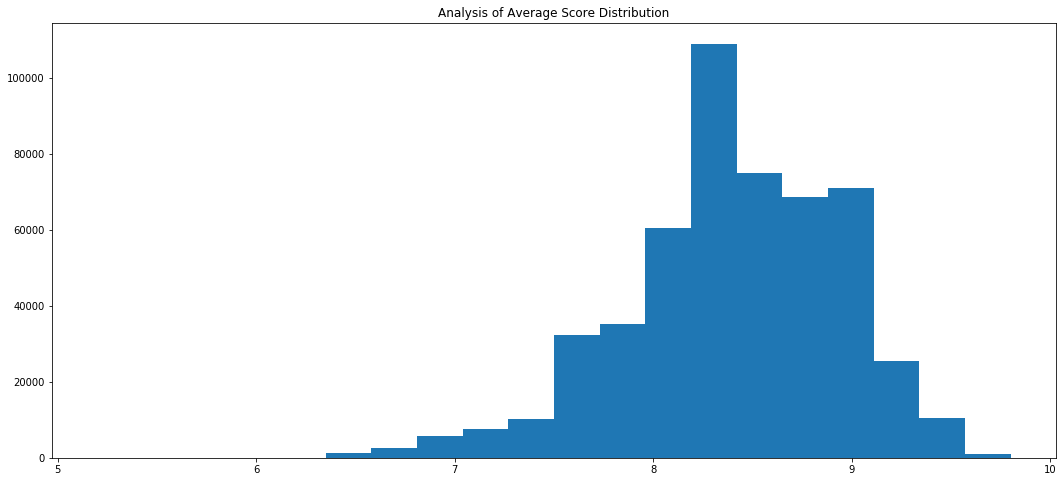

In [142]:
plt.figure(figsize=(18,8))
plt.hist(x=hotel_reviews.Average_Score, bins = 20)
plt.title("Analysis of Average Score Distribution");

### Analysis

Key observations include the maximum average hotel score at 9.8, with customers generally averaging around 8.3. Notably, upset customers tend to have longer and more indepth reviews describing their specfic probelms. Reviewing activities peak in the middle of the month, coinciding with instances when customers give their highest scores.

The data set comprises 30 columns and 515,738 reviews given to the various hotels around the world belonging to Hotel Inc. Based on the one-hot encoded columns we can see that the hotels are located in six cities: Amsterdam, Barcelona, London, Milan, PAris, and Vienna.

The analysis of hotel review scores indicates a the normal distribution of average scores, revealing a right skew with the majority of rating falling between 8 & 9. This aligns with the earlier average score observation of 8.3, making it suitable for regression modeling since it follows a normalized gausian distribution.

## Pre-Processing <a class="anchor" id="Prep"></a>

In [5]:
hotel_reviews['Negative_Review']

0          I am so angry that i made this post available...
1                                               No Negative
2          Rooms are nice but for elderly a bit difficul...
3          My room was dirty and I was afraid to walk ba...
4          You When I booked with your company on line y...
                                ...                        
515733     no trolly or staff to help you take the lugga...
515734             The hotel looks like 3 but surely not 4 
515735     The ac was useless It was a hot week in vienn...
515736                                          No Negative
515737         I was in 3rd floor It didn t work Free Wife 
Name: Negative_Review, Length: 515738, dtype: object

In [6]:
hotel_reviews['Positive_Review']

0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4           Amazing location and building Romantic setting 
                                ...                        
515733                                             location
515734        Breakfast was ok and we got earlier check in 
515735                                          No Positive
515736     The rooms are enormous and really comfortable...
515737                                 staff was very kind 
Name: Positive_Review, Length: 515738, dtype: object

In [7]:
# This shows us that this data set has relatively balanced classes or more generally a balanaced classification problem
hotel_reviews['Reviewer_Score'].value_counts()

1    293974
0    221764
Name: Reviewer_Score, dtype: int64

In [8]:
XN = hotel_reviews['Negative_Review']
XP = hotel_reviews['Positive_Review']
y = hotel_reviews["Reviewer_Score"] #Target as defined by our problem statement/client

## Modeling <a class="anchor" id="Model"></a>

In [9]:
# Split data in test and training parts
XN_train, XN_test, yn_train, yn_test = train_test_split(XN, y, test_size = 0.3, random_state=1)
XP_train, XP_test, yp_train, yp_test = train_test_split(XP, y, test_size = 0.3, random_state=1)

print(XN_train.shape)
print(XP_train.shape)

(361016,)
(361016,)


In [10]:
#Nbagofwords = CountVectorizer(stop_words="english",
                              #min_df=10,
                             #max_features=500)
#Pbagofwords = CountVectorizer(stop_words="english",
                              #min_df=10,
                             #max_features=500)

# 2. Fit
#Nbagofwords.fit(XN)

# 3. Transform
#XN_transformed = Nbagofwords.transform(XN)

# 2. Fit
#Pbagofwords.fit(XP)

# 3. Transform
#XP_transformed = Pbagofwords.transform(XP)


We will be using a count vectorizer to not only split up the reviews in specfic words but also encode them as binary values to make logistic regressional analysis possible for sentiment analysis. We will also additionally eliminate any stop words from the english dictionary and set the minimum times a word has to occurr within the data set to 10 as well as limiting our total features to 500 as reccomended by Hotel Inc. Thsi should help speed up our model learn process and lessen the noise in our system

In [11]:
# 1. Instantiate
Nbagofwords = CountVectorizer(stop_words="english",
                              min_df=10,
                             max_features=500)
Pbagofwords = CountVectorizer(stop_words="english",
                              min_df=10,
                             max_features=500)

# 2. Fit
Nbagofwords.fit(XN_train)

# 3. Transform
XN_train_transformed = Nbagofwords.transform(XN_train)
XN_test_transformed = Nbagofwords.transform(XN_test)

# 2. Fit
Pbagofwords.fit(XP_train)

# 3. Transform
XP_train_transformed = Pbagofwords.transform(XP_train)
XP_test_transformed = Pbagofwords.transform(XP_test)


In [12]:
# Validation
len(Nbagofwords.get_feature_names())

500

In [13]:
# Validation
len(Pbagofwords.get_feature_names())

500

In [143]:
Nwords = Nbagofwords.get_feature_names()
Pwords = Pbagofwords.get_feature_names()

In [15]:
# Sampling for testing to ensure that we can see specfic words and there relevant counts. 
#Allows us to roughly validate our initial parameters for the count vectorizer.
words = Nbagofwords.get_feature_names()
some_indices = range(1, 500, round(500/10)) # just pick some indices

samples = [words[i] for i in some_indices]
print(samples)

['10', 'buffet', 'cool', 'excellent', 'high', 'longer', 'noise', 'public', 'smoking', 'trying']


In [16]:
counts = np.array(XN_train_transformed[:, some_indices].sum(axis = 0))
display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

10  buffet  cool  excellent  high  longer  noise  \
total_corpus_count  3512    1958  1020       1675  3794    1175   8277   

                    public  smoking  trying  
total_corpus_count    1162     1325    1239

In [18]:
#XN_transformed.toarray().sum(axis=0)

In [19]:
#XP_transformed.toarray().sum(axis=0)

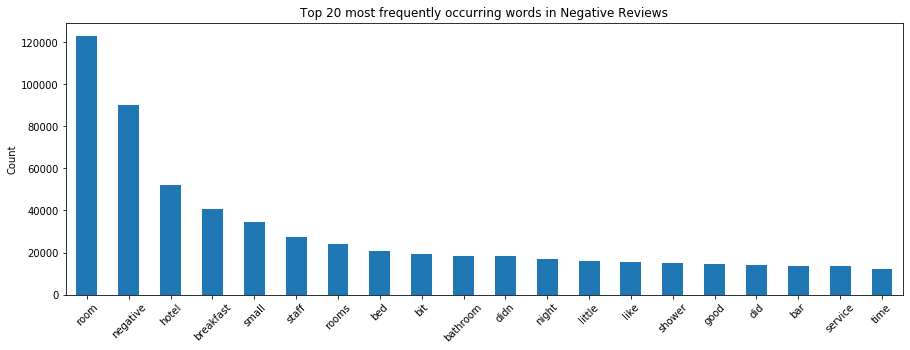

In [20]:
# Indicates the most common words used in Negative Reviews
word_counts = pd.DataFrame(
    {"counts": XN_train_transformed.toarray().sum(axis=0)},
    index=Nbagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in Negative Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

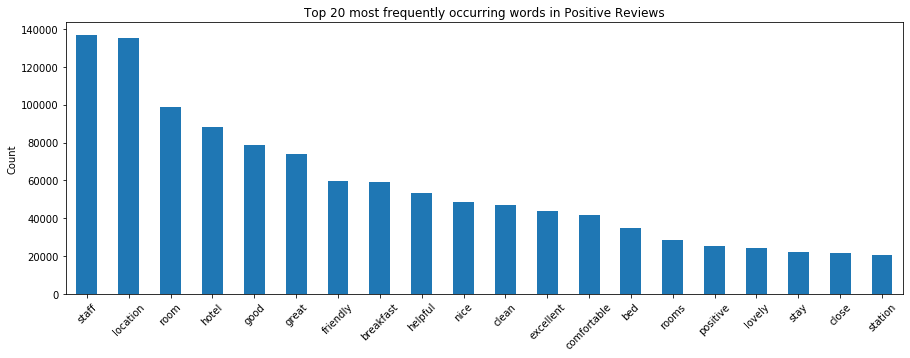

In [21]:
# Indicates the most common words used in Positive Reviews
word_counts = pd.DataFrame(
    {"counts": XP_train_transformed.toarray().sum(axis=0)},
    index=Pbagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in Positive Reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [22]:
#Concatonating data sets
X_train_transformed = hstack((XN_train_transformed,XP_train_transformed))
X_test_transformed = hstack((XN_test_transformed, XP_test_transformed))
y_test = yn_test
y_train = yn_train

In [83]:
# Dataset Validation
yn_train == yp_train

476161    True
430631    True
446954    True
485855    True
164671    True
          ... 
491263    True
267336    True
470924    True
491755    True
128037    True
Name: Reviewer_Score, Length: 361016, dtype: bool

In [24]:
# Dataset Validation
yn_test == yp_test

356054    True
395957    True
468352    True
281462    True
498978    True
          ... 
278548    True
298811    True
267403    True
272130    True
471301    True
Name: Reviewer_Score, Length: 154722, dtype: bool

### Logistical Regression <a class="anchor" id="LR"></a>

In [25]:
# Fitting a model
logreg = LogisticRegression(C = 0.1, random_state = 1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.7803033660557981
Test score: 0.7812334380372539


In [110]:
estimators = [('reduce_dim', PCA(n_components=20)),
              ('Logreg', LogisticRegression(random_state=1))]

pipe1 = Pipeline(estimators) 

In [111]:
# Basic search to see what C values work best for the model in general without cross-valuation
params = {'reduce_dim' : [PCA(n_components = 20), None],
    'Logreg__C': [0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(pipe1, param_grid=params)

In [61]:
%%time
fitted_search = grid_search.fit(X_train_transformed.toarray(), y_train)

Wall time: 45min


In [62]:
%%time 
fitted_search.score(X_test_transformed.toarray(), y_test)

Wall time: 1.42 s


0.7812334380372539

In [63]:
fitted_search.best_estimator_

Pipeline(steps=[('reduce_dim', None), ('Logreg', LogisticRegression(C=0.1))])

In [144]:
# Just an alarm to let me know when code has completed running
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

In [65]:
# See hwo the model performed at various C Values
fitted_search.cv_results_['mean_test_score']

array([0.74478418, 0.77837548, 0.74543234, 0.77827853, 0.74547943,
       0.77826468, 0.7454268 , 0.77828407, 0.74528553, 0.77827853])

In [26]:
merged_features = FeatureUnion([('N', Nbagofwords),('P', Pbagofwords)])

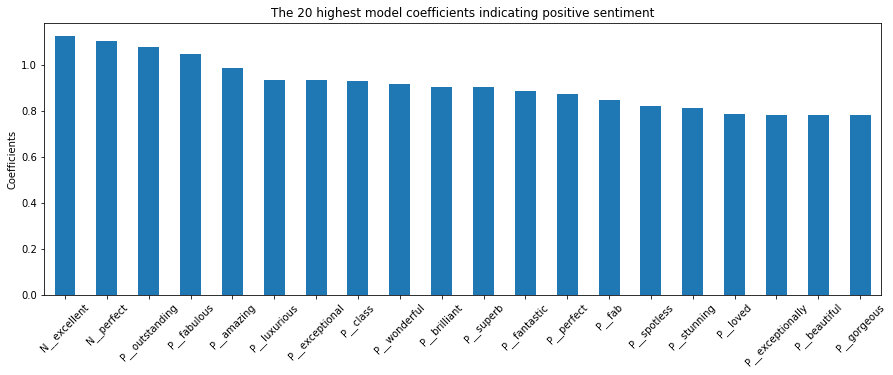

In [27]:
# This way we can see how our model interprets the impact of each word and whcih count vectorizer object the word originated from
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=merged_features.get_feature_names()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

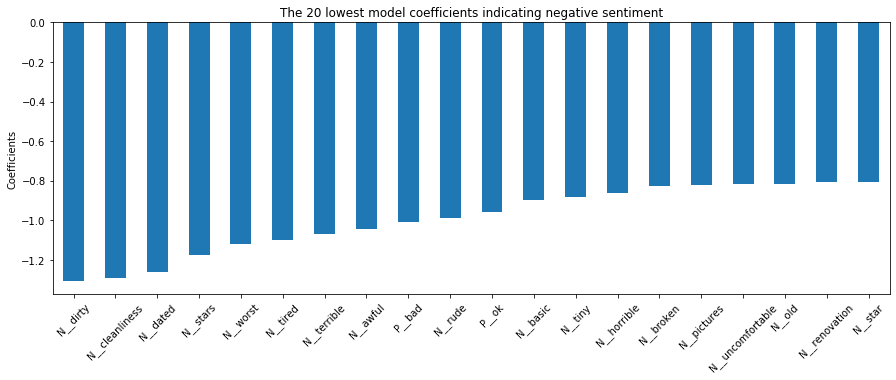

In [28]:
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Logistic Regression Cross Validation & HyperParameter Optimization for C 
%%time
C_cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_train_transformed.toarray(), y_train, cv = 5))
    
    C_cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, C_cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

In [ ]:
C_which_max = np.array(C_cross_validation_scores).argmax()

print("The best model has C = ",C_range[C_which_max], 'with a performance of:', round(max(C_cross_validation_scores),4)*100, '%')

### PCA & Descion Tree Pipeline <a class="anchor" id="Pipe"></a>

In [75]:
 estimators = [('reduce_dim', PCA(n_components=20)),
              ('DT', DecisionTreeClassifier())]

pipe = Pipeline(estimators)  

In [31]:
pipe.fit(X_train_transformed.toarray(), y_train)


Pipeline(steps=[('reduce_dim', PCA(n_components=20)),
                ('DT', DecisionTreeClassifier(max_depth=2))])

In [32]:
pipe.score(X_test_transformed.toarray(), y_test)

0.6972376261940771

In [77]:
params = {'DT__max_depth': [5, 10, 15, 20],
         'DT__min_samples_leaf':  [1,5,10,15]}

grid_search = GridSearchCV(pipe, param_grid=params)

In [78]:
%%time
fitted_search = grid_search.fit(X_train_transformed.toarray(), y_train)

Wall time: 1h 2min 2s


In [79]:
fitted_search.score(X_test_transformed.toarray(), y_test)

0.7424606713977328

In [80]:
fitted_search.best_estimator_

Pipeline(steps=[('reduce_dim', PCA(n_components=20)),
                ('DT',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=15))])

In [94]:
# Just an alarm
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

In [84]:
fitted_search.cv_results_['mean_test_score']

array([0.73246062, 0.73244954, 0.73246616, 0.73246339, 0.73988965,
       0.7396819 , 0.73976777, 0.74069294, 0.72346101, 0.72133368,
       0.7219874 , 0.72481552, 0.69832086, 0.69550934, 0.70367795,
       0.71136183])

Since we tested max depth and min leaf nodes with grid search we can now narrow our search to max_depth = 10 & min smaples[5,10, 15] as all of them were pretty close. This was done as when I ran the cross validation alongside an extended grid_search the command took nearly 3 hrs to run. This allows us to narrow our scope before implementing cross_validation into the mix

ValueError: x and y must have same first dimension, but have shapes (17,) and (11,)

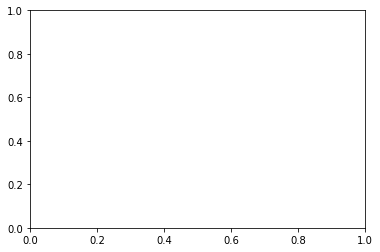

In [93]:
%%time
MS_cross_validation_scores = []

Min_Samples_range = np.array([5,6,7,8,9,10,11,12,13,14,15])

#Do some cross validation
for ms in Min_Samples_range:
    estimators = [('reduce_dim', PCA(n_components=20)),
              ('DT', DecisionTreeClassifier(max_depth = 10,min_samples_leaf = ms, random_state = 1))]

    pipe = Pipeline(estimators) 
    
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(pipe, X_train_transformed.toarray(), y_train, cv = 5))
    
    MS_cross_validation_scores.append(cv_score)

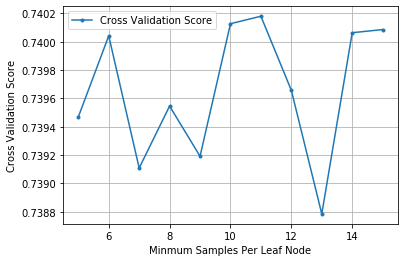

In [96]:
plt.figure()
plt.plot(Min_Samples_range, MS_cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xlabel('Minimum Samples Per Leaf Node')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

In [108]:
MS_which_max = np.array(MS_cross_validation_scores).argmax()

print("The best model that uses a PCA, DT pipeline has a Max_Depth of 10 & a Min Sample Quantity of",Mini_Samples_range[MS_which_max], 'with a model performance of:', round(max(Mscross_validation_scores),4)*100, '%')
print("Conversely, our best Logistic Regression model has a C of",C_range[C_which_max],'with a model performance of:', round(max(C_cross_validation_scores),4)*100, '%' )

The best model that uses a PCA, DT pipeline has a Max_Depth of 10 & a Min Sample Quantity of 11 with a model performance of: 74.02 %


Since our logistic regression model performed beter than our pipeline model lets explore it further with the use of a confusion matrix

In [145]:
# Rebuilding the model based on hyperparameter optimization and comparrison results
logreg = LogisticRegression(C = 0.1, random_state = 1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.7803033660557981
Test score: 0.7812334380372539


In [146]:
y_pred = logreg.predict(X_test_transformed)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns (Negative sentiment is 0 and Postive Sentiment is 1)
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative Sentinment", "Predicted Positive Sentinment"],
    index=["True Negative Sentinment", "True Positive Sentinment"]
)

display(cf_df)

Predicted Negative Sentinment  \
True Negative Sentinment                          47114   
True Positive Sentinment                          14344   

                          Predicted Positive Sentinment  
True Negative Sentinment                          19504  
True Positive Sentinment                          73760

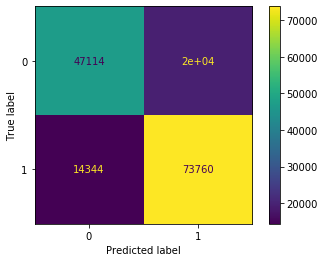

In [114]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(logreg, X_test_transformed, y_test);

In [123]:
Accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
Precision = round(metrics.precision_score(y_test, y_pred), 2)
Sensitivity_recall = round(metrics.recall_score(y_test, y_pred),2)
Specificity = round(metrics.recall_score(y_test, y_pred, pos_label=0),2)
F1_score = round(metrics.f1_score(y_test, y_pred),2)

#metrics:
print({"Percent Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


{'Percent Accuracy': 78.12, 'Precision': 0.79, 'Sensitivity_recall': 0.84, 'Specificity': 0.71, 'F1_score': 0.81}


## Confusion Matrix Anaysis <a class="anchor" id="Con"></a>

### Interpretation:

   ***Accuracy:*** The model is correctly predicting sentiments with an overall accuracy calculated from both positive and negative sentiments.

   ***Precision (Positive Sentiment):*** Of all the instances predicted as positive, around 79% are actually positive.

   ***Recall (Positive Sentiment):*** The model correctly identifies approximately 84% of the actual positive sentiments.

   ***Specificity (Negative Sentiment):*** The model correctly identifies around 71% of the actual negative sentiments.

   ***False Positive Rate (FPR):*** About 29% of actual negative sentiments are incorrectly classified as positive.

   ***False Negative Rate (FNR):*** Approximately 16% of actual positive sentiments are incorrectly classified as negative.

### Conclusion:

The model seems to have a reasonable balance between precision and recall for positive sentiment prediction. It is important for Hotel Inc to consider the specific goals and costs associated with false positives and false negatives for them to implement this model into their business

If Hotel Inc requires a more accurate classification model, different modeling techniques like ensembles and extended grids of hyperparameters may lead to more accurate models however these models come with the added cost of increased time to build and train them as well as the additional processing energy needed to run them.